In [6]:
import numpy as np
import plotly.express as px
import pandas as pd
import json


In [7]:
measurments = json.load(open("param3.json"))
def calculate_quadrant_statistics(entry):
    name, dict1, dict2 = entry

    values1 = []
    values2 = []
    above_count=0
    above_count2=0
    for quadrant in dict1.keys():
        values1.append(dict1[quadrant])
        values2.append(dict2[quadrant])
        if dict1[quadrant] > 10:
            above_count+=1
        if dict2[quadrant] > 10:
            above_count2+=1
        

        # Calculate summary statistics for the differences
    mean_occupancy = np.mean(values1)
    std = np.std(values1)


    mean_ray_pass = np.mean(values2)
    std_ray_pass = np.std(values2)

    quadrant_statistics2 ={
            'Name': name,
            'Mean_occupancy': mean_occupancy,
            'exceeded_count': above_count,
            'Std_occupancy': std,
            'Mean_pass': mean_ray_pass,
            'exceeded_ray_count': above_count2,
            'Std_pass': std_ray_pass,
        }

    return quadrant_statistics2

# List to store the results
results = []


# Iterate through the data_list and calculate statistics for each name and quadrant
for entry in measurments:
    quadrant_stats = calculate_quadrant_statistics(entry)
    results.append(quadrant_stats)

In [8]:
# Add avergeing over grouos

In [9]:
df_ee = pd.read_csv("../data/processed/CPA_virtual_clusters_predictions.csv")

df = pd.DataFrame.from_dict(results, orient='columns')
df = df.reset_index()

df['Count'] = df.groupby('Name')['Mean_occupancy'].transform('count')
average_ee_by_name = df_ee.groupby('Imine')['Predicted ee'].mean().reset_index()
max_ee_by_name = df_ee.groupby(['Imine',"Catalyst_Ar_grp"])['Predicted ee'].max().reset_index()
max_ee_by_name = max_ee_by_name.loc[max_ee_by_name.groupby('Imine')['Predicted ee'].idxmax()]

average_ee_by_name = average_ee_by_name.rename(columns={'Imine': 'Name'})

max_ee_by_name = max_ee_by_name.rename(columns={'Imine': 'Name'})
max_ee_by_name = max_ee_by_name.rename(columns={'Predicted ee': 'ee_max'})

# Match the 'ee' column with the 'Experiment' column in your DataFrame based on name
df = pd.merge(df, average_ee_by_name, how='left', on='Name')

df = pd.merge(df, max_ee_by_name, how='left', on='Name')

In [10]:
df_ee["rank"] = df_ee.groupby("rxn")["Predicted ee"].rank(method="dense", ascending=False)

mean_rank = df_ee.groupby(['Catalyst_Ar_grp'])['rank'].mean()
print(mean_rank)

fig = px.bar(x=mean_rank.index, y=mean_rank,
                labels={'x':'Catalyst Class', 'y':'Rank Gen'},
                template='simple_white',
                width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.show()


Catalyst_Ar_grp
L1     12.263032
L10     5.752750
L11     4.324247
L12     6.440100
L13    10.835844
L14     1.677786
L15     7.764467
L16     6.789574
L2     12.172525
L4     10.278455
L5      9.524868
L6     10.751435
L7      8.172286
L8      7.871114
L9      5.381516
Name: rank, dtype: float64


In [131]:

def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.95))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby('Catalyst_Ar_grp')['Predicted ee'].apply(calculate_var_es).reset_index()
results = results.sort_values(by="Predicted ee",ascending=True)




fig = px.bar(results, y='Catalyst_Ar_grp', x='Predicted ee', title='VAR and ES by Asset Type',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1')

# Customize the layout
fig.update_layout(xaxis_title='Asset Type', yaxis_title='Value', legend_title=None, xaxis_tickangle=-4)

# Show the plot
fig.show()

In [128]:
df_ee["Normalized_rank"]= 0
df_ee['Normalized_rank'] = (
    df_ee.groupby('rxn')['Predicted ee'].transform(lambda g: (g-g.min())/(g.max()-g.min()))
)
def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.95))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby('Catalyst_Ar_grp')['Normalized_rank'].apply(calculate_var_es).reset_index()
results = results.sort_values(by="Normalized_rank",ascending=True)




fig = px.bar(results, y='Catalyst_Ar_grp', x='Normalized_rank', title='VAR and ES by Asset Type',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1')

# Customize the layout
fig.update_layout(xaxis_title='Asset Type', yaxis_title='Value', legend_title=None, xaxis_tickangle=-4)

# Show the plot
fig.show()
results

Catalyst_Ar_grp level_1  Normalized_rank
0               L1     VAR         0.000000
12             L15     VAR         0.000000
8              L13     VAR         0.000000
16              L2     VAR         0.000000
2              L10     VAR         0.000000
27              L8      ES         0.000053
26              L8     VAR         0.003274
15             L16      ES         0.007219
25              L7      ES         0.017823
23              L6      ES         0.031947
21              L5      ES         0.037526
14             L16     VAR         0.040501
19              L4      ES         0.053623
24              L7     VAR         0.070771
22              L6     VAR         0.072948
7              L12      ES         0.075709
20              L5     VAR         0.080060
18              L4     VAR         0.089263
29              L9      ES         0.131847
6              L12     VAR         0.140656
28              L9     VAR         0.237691
5              L11      ES         0.329495
4              L11     VAR         0.425731
11             L14      ES         0.426923
10             L14     VAR         0.703561
1               L1      ES              NaN
3              L10      ES              NaN
9              L13      ES              NaN
13             L15      ES              NaN
17              L2      ES              NaN

In [124]:
def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.95))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return  es #pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label" ])['Predicted ee'].apply(calculate_var_es).reset_index()
df_split =  pd.DataFrame(results)
mean_rank = df_split.groupby(['Catalyst_Ar_grp' ])['Predicted ee'].mean()
mean_rank = mean_rank.sort_values( ascending=True)

fig = px.bar(x=mean_rank, y=mean_rank.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

In [123]:
def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.95))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return  es #pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label" ])['Normalized_rank'].apply(calculate_var_es).reset_index()
df_split =  pd.DataFrame(results)
mean_rank = df_split.groupby(['Catalyst_Ar_grp' ])['Normalized_rank'].mean()
mean_rank = mean_rank.sort_values( ascending=True)

fig = px.bar(x=mean_rank, y=mean_rank.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

In [122]:
def calculate_var_es(data, p=0.05):
    var = np.percentile(data, 100 * (p))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return  var #pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label" ])['Predicted ee'].apply(calculate_var_es).reset_index()
df_split =  pd.DataFrame(results)
mean_rank = df_split.groupby(['Catalyst_Ar_grp' ])['Predicted ee'].mean()
mean_rank = mean_rank.sort_values( ascending=True)

fig = px.bar(x=mean_rank, y=mean_rank.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

In [119]:
def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.95))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return  var #pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label" ])['Normalized_rank'].apply(calculate_var_es).reset_index()
df_split =  pd.DataFrame(results)
mean_rank = df_split.groupby(['Catalyst_Ar_grp' ])['Normalized_rank'].mean()
mean_rank = mean_rank.sort_values( ascending=True)

fig = px.bar(x=mean_rank, y=mean_rank.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

# Quantile Rank

In [118]:
#df_ee["Quantile_rank"] = df_ee.groupby("rxn")["Predicted ee"].apply(pd.qcut,q=10)

df_ee["Quantile_rank"]= 0
#pd.qcut(x=df_ee.groupby("rxn")['Predicted ee'], q=10, labels=False)
"""
for rea in np.unique(df_ee["rxn"]):
    x= pd.qcut(df_ee.loc[df_ee["rxn"]==rea]["Predicted ee"],q=20)
"""

df_ee['Quantile_rank'] = (
    df_ee.groupby('rxn')['Predicted ee']
        .transform(lambda g: pd.qcut(g, q=100, labels=False))
)
mean_rank = df_ee.groupby(['Catalyst_Ar_grp'])['Quantile_rank'].mean()
print(mean_rank)
mean_rank = mean_rank.sort_values( ascending=True)

fig = px.bar(x=mean_rank, y=mean_rank.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()


Catalyst_Ar_grp
L1     19.200980
L10    65.412363
L11    75.674797
L12    60.559900
L13    29.395863
L14    94.238642
L15    51.284792
L16    58.181133
L2     19.825921
L4     33.166069
L5     38.567193
L6     29.802248
L7     48.342539
L8     50.359397
L9     67.988164
Name: Quantile_rank, dtype: float64


In [116]:
df_ee["groupedrank"] = df_ee.groupby(["rxn"])["Predicted ee"].rank(method="dense", ascending=False)
#'Catalyst_Ar_grp'
mean_rank2 = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label" ])['groupedrank'].mean()
print(mean_rank2)
catlist= np.unique(df_ee["Catalyst_Ar_grp"])
df_split =  pd.DataFrame(mean_rank2)
mean_rank3 = df_split.groupby(['Catalyst_Ar_grp' ])['groupedrank'].mean()
print(mean_rank3)
nuclist= np.unique(df_ee["cluster_label"])
mean_rank3 = mean_rank3.sort_values( ascending=True)

fig = px.bar(x=mean_rank3, y=mean_rank3.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()


Catalyst_Ar_grp  cluster_label
L1               0                 9.495238
                 1                13.945378
                 2                10.468254
                 3                10.461538
                 4                12.294554
                                    ...    
L9               45                6.794643
                 46                1.991667
                 47                2.329670
                 48                7.974790
                 49                8.071429
Name: groupedrank, Length: 750, dtype: float64
Catalyst_Ar_grp
L1     12.150326
L10     5.440563
L11     4.243190
L12     6.148776
L13    11.119978
L14     1.680391
L15     7.567576
L16     6.679368
L2     12.127275
L4     10.252377
L5      9.987933
L6     10.701211
L7      7.816047
L8      8.330360
L9      5.754630
Name: groupedrank, dtype: float64


In [111]:
df_ee["Normalized_rank"]= 0
df_ee['Normalized_rank'] = (
    df_ee.groupby('rxn')['Predicted ee'].transform(lambda g: (g-g.min())/(g.max()-g.min()))
    
)
mean_quant = df_ee.groupby(['Catalyst_Ar_grp'])['Normalized_rank'].mean()
mean_quant = mean_quant.sort_values( ascending=True)

print(mean_rank)

fig = px.bar(x=mean_quant, y=mean_quant.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()
print(mean_quant.sort_values())
mean_rank.sort_values()
NEWDF = pd.DataFrame()
NEWDF['Normalized_rank']= df_ee['Normalized_rank']
NEWDF['rxn']= df_ee['rxn']

Catalyst_Ar_grp
L1     12.263032
L10     5.752750
L11     4.324247
L12     6.440100
L13    10.835844
L14     1.677786
L15     7.764467
L16     6.789574
L2     12.172525
L4     10.278455
L5      9.524868
L6     10.751435
L7      8.172286
L8      7.871114
L9      5.381516
Name: rank, dtype: float64


Catalyst_Ar_grp
L2     0.167088
L1     0.191652
L13    0.251852
L6     0.257509
L4     0.288091
L5     0.314466
L7     0.436720
L8     0.444137
L15    0.454236
L16    0.511399
L12    0.547936
L10    0.621154
L9     0.624019
L11    0.674703
L14    0.949743
Name: Normalized_rank, dtype: float64


In [113]:
df_ee["Normalized_rank"]= 0
df_ee['Normalized_rank'] = (df_ee.groupby('rxn')['Predicted ee'].transform(lambda g: (g-g.min())/(g.max()-g.min())))
mean_quant = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label"])['Normalized_rank'].mean()
print(mean_rank)
df_split =  pd.DataFrame(mean_quant)

mean_rank3 = df_split.groupby(['Catalyst_Ar_grp' ])['Normalized_rank'].mean()
mean_rank3 = mean_rank3.sort_values( ascending=True)

fig = px.bar(x=mean_rank3, y=mean_rank3.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()
print(mean_quant.sort_values())
mean_rank.sort_values()
NEWDF = pd.DataFrame()
NEWDF['Normalized_rank']= df_ee['Normalized_rank']
NEWDF['rxn']= df_ee['rxn']

Catalyst_Ar_grp
L1     12.263032
L10     5.752750
L11     4.324247
L12     6.440100
L13    10.835844
L14     1.677786
L15     7.764467
L16     6.789574
L2     12.172525
L4     10.278455
L5      9.524868
L6     10.751435
L7      8.172286
L8      7.871114
L9      5.381516
Name: rank, dtype: float64


Catalyst_Ar_grp  cluster_label
L13              2                0.000000
                 38               0.000000
                 29               0.000000
                 44               0.000000
                 17               0.000089
                                    ...   
L10              44               1.000000
L14              5                1.000000
                 19               1.000000
                 42               1.000000
                 36               1.000000
Name: Normalized_rank, Length: 750, dtype: float64


In [115]:
df_ee["Corrected_ee"]= 0
df_ee['Corrected_ee'] = (df_ee.groupby('rxn')['Predicted ee'].transform(lambda g: g-g.max()))
mean_quant = df_ee.groupby(['Catalyst_Ar_grp',"cluster_label"])['Corrected_ee'].mean()

print(mean_rank)
df_split =  pd.DataFrame(mean_quant)
#df_split[['cat', 'nuc']] = str(df_split.index).split(',')
mean_rank3 = df_split.groupby(['Catalyst_Ar_grp' ])['Corrected_ee'].mean()
mean_rank3 = mean_rank3.sort_values( ascending=True)

fig = px.bar(x=mean_rank3, y=mean_rank3.index,
                title='Standardized',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', 'Catalyst_Ar_grp':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=20,
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()

print(mean_quant.sort_values())
mean_rank.sort_values()
NEWDF = pd.DataFrame()
NEWDF['Corrected_ee']= df_ee['Corrected_ee']
NEWDF['rxn']= df_ee['rxn']

Catalyst_Ar_grp
L1     12.263032
L10     5.752750
L11     4.324247
L12     6.440100
L13    10.835844
L14     1.677786
L15     7.764467
L16     6.789574
L2     12.172525
L4     10.278455
L5      9.524868
L6     10.751435
L7      8.172286
L8      7.871114
L9      5.381516
Name: rank, dtype: float64


Catalyst_Ar_grp  cluster_label
L13              44              -55.646342
                 29              -53.644357
                 2               -53.253592
L1               41              -49.492295
L13              38              -49.061524
                                    ...    
L14              42                0.000000
                 19                0.000000
                 5                 0.000000
                 33                0.000000
L10              44                0.000000
Name: Corrected_ee, Length: 750, dtype: float64


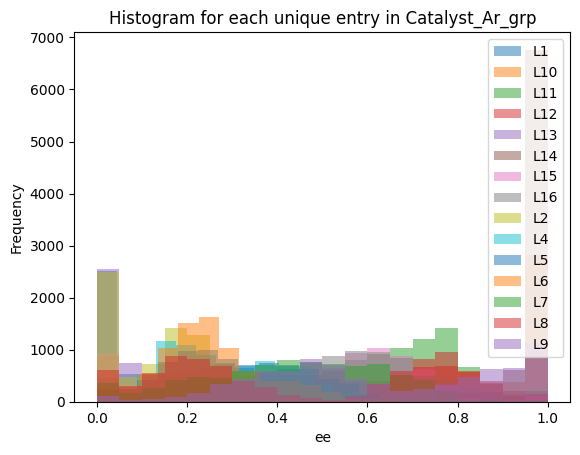

In [83]:
import matplotlib.pyplot as plt


grouped = df_ee.groupby('Catalyst_Ar_grp')

# Plotting histograms for each group
for name, group in grouped:
    plt.hist(group['Normalized_rank'], bins=20, alpha=0.5, label=name)


    

plt.xlabel('ee')
plt.ylabel('Frequency')
plt.title('Histogram for each unique entry in Catalyst_Ar_grp')
plt.legend()
plt.show()

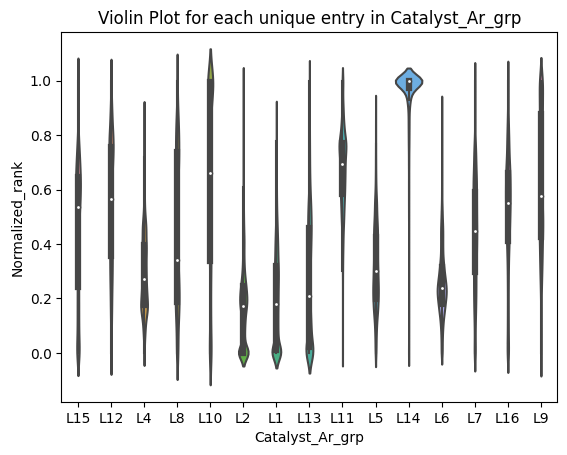

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame


# Violin plot
sns.violinplot(x='Catalyst_Ar_grp', y='Normalized_rank', data=df_ee)
plt.title('Violin Plot for each unique entry in Catalyst_Ar_grp')
plt.show()

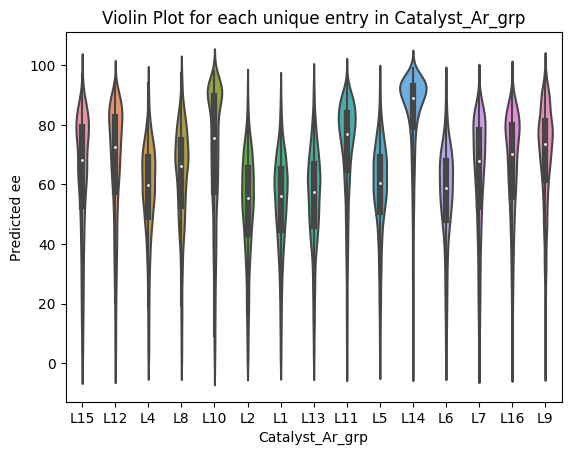

In [87]:
sns.violinplot(x='Catalyst_Ar_grp', y='Predicted ee', data=df_ee)
plt.title('Violin Plot for each unique entry in Catalyst_Ar_grp')
plt.show()

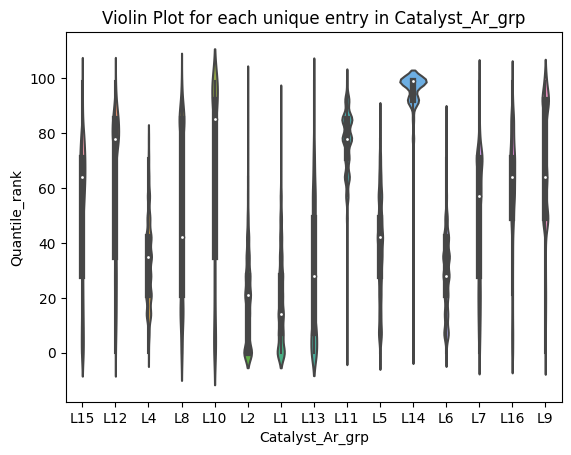

In [88]:
sns.violinplot(x='Catalyst_Ar_grp', y='Quantile_rank', data=df_ee)
plt.title('Violin Plot for each unique entry in Catalyst_Ar_grp')
plt.show()

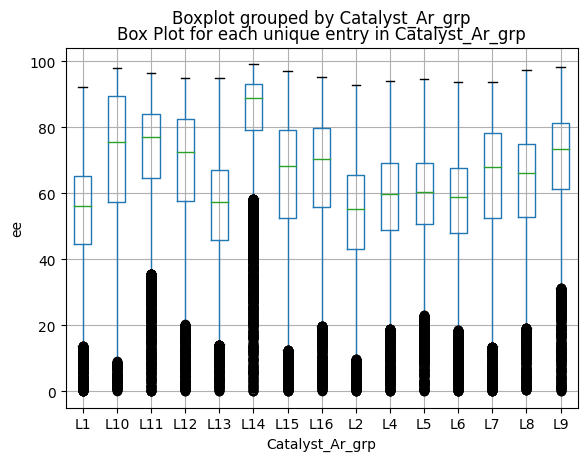

In [90]:

# Box plot
df_ee.boxplot(column='Predicted ee', by='Catalyst_Ar_grp')

plt.title('Box Plot for each unique entry in Catalyst_Ar_grp')
plt.xlabel('Catalyst_Ar_grp')
plt.ylabel('ee')
plt.show()

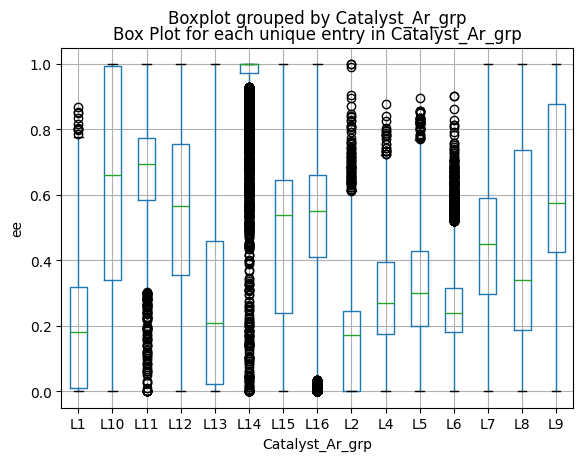

In [91]:
df_ee.boxplot(column='Normalized_rank', by='Catalyst_Ar_grp')

plt.title('Box Plot for each unique entry in Catalyst_Ar_grp')
plt.xlabel('Catalyst_Ar_grp')
plt.ylabel('ee')
plt.show()

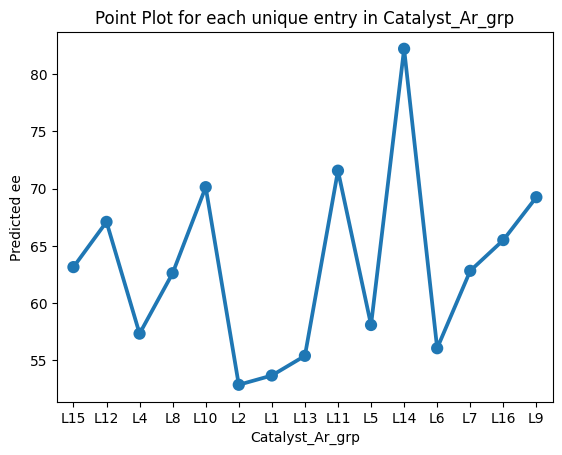

In [95]:
sns.pointplot(x='Catalyst_Ar_grp', y='Predicted ee', data=df_ee, errorbar=None)
plt.title('Point Plot for each unique entry in Catalyst_Ar_grp')
plt.show()

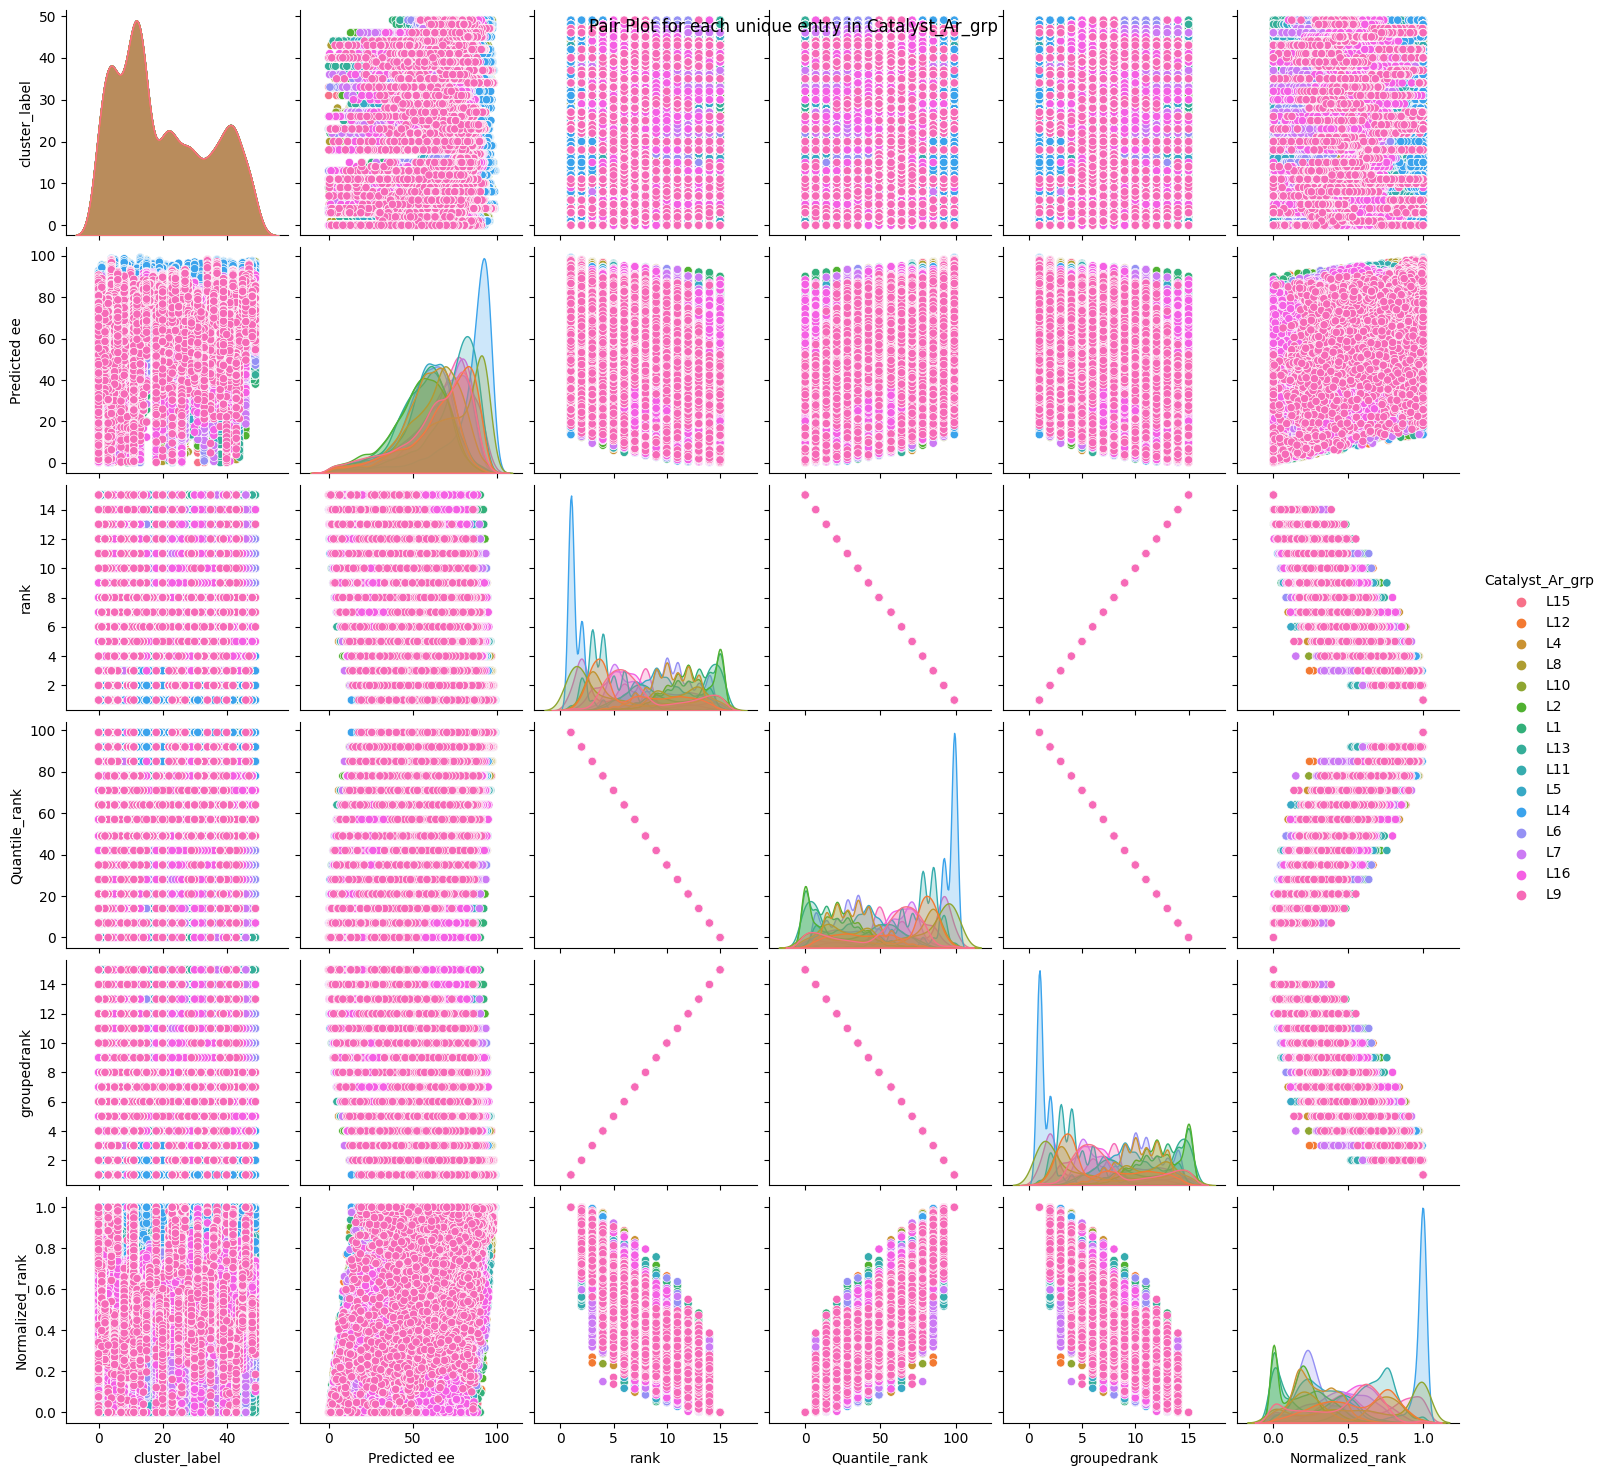

In [96]:
sns.pairplot(df_ee, hue='Catalyst_Ar_grp')
plt.suptitle('Pair Plot for each unique entry in Catalyst_Ar_grp')
plt.show()

In [98]:
fig = px.histogram(df_ee, x='Predicted ee', color='Catalyst_Ar_grp', marginal='rug',
                   title='Interactive Histogram for each unique entry in Catalyst_Ar_grp')

# Show the plot
fig.show()